In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import plotly.express as px
from ipywidgets import interact
import ipywidgets as widgets

In [84]:
confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

death_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

recovered_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [85]:
country_df.head(5)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
0,Afghanistan,2023-03-10 13:21:02,33.93911,67.709953,209484,7896,NaN,NaN,538.127222,NaN,NaN,3.769262,4,AFG,680,0.0
1,Albania,2023-03-10 13:21:02,41.15330,20.168300,334457,3598,NaN,NaN,11621.968170,NaN,NaN,1.075774,8,ALB,228,2.0
2,Algeria,2023-03-10 13:21:02,28.03390,1.659600,271496,6881,NaN,NaN,619.132366,NaN,NaN,2.534476,12,DZA,90,0.0
3,Andorra,2023-03-10 13:21:02,42.50630,1.521800,47890,165,NaN,NaN,61981.492267,NaN,NaN,0.344540,20,AND,30,0.0
4,Angola,2023-03-10 13:21:02,-11.20270,17.873900,105288,1933,NaN,NaN,320.352770,NaN,NaN,1.835917,24,AGO,104,2.0


In [86]:
# data cleaning

# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# changing province/state to state and country/region to country
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})
# country_df.head()

In [87]:
# total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

In [95]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504g4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

In [89]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)

# Les 10 pays les plus touchés (graphique en bâton)

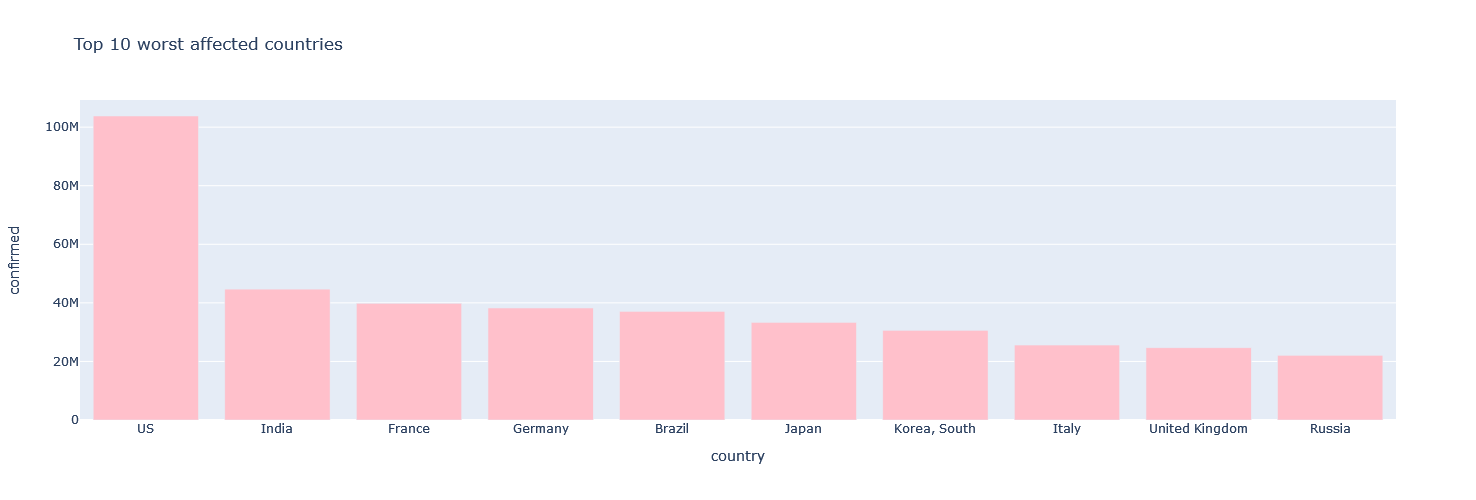

In [90]:
# display 
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "confirmed",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

# Les 10 pays les plus touchés (bubble chart)

[Utilisation d'un bubble chart](https://www.storytellingwithdata.com/blog/2021/5/11/what-is-a-bubble-chart)



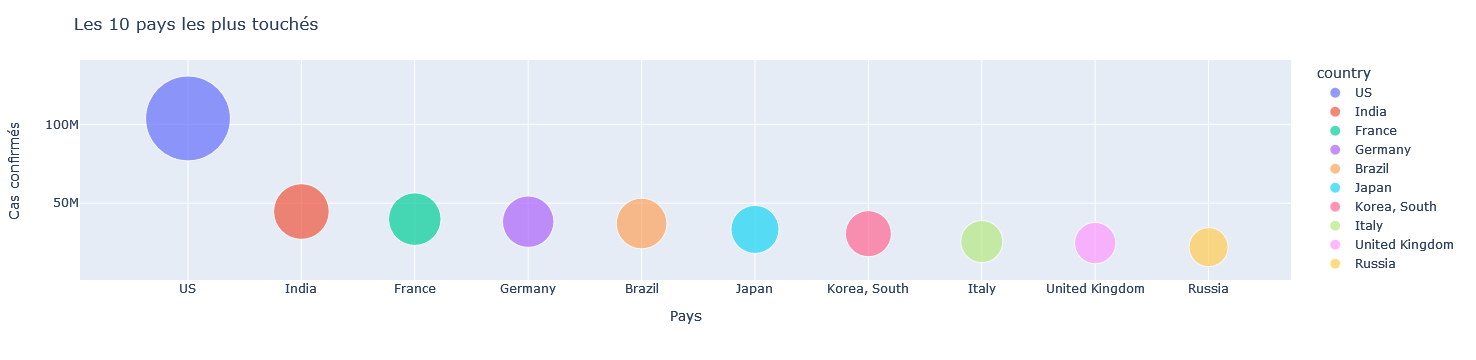

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

In [97]:

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="country", y="confirmed", size="confirmed", color="country",
               hover_name="country", size_max=60)
    fig.update_layout(
    title=f"Les {str(n)} pays les plus touchés",
    xaxis_title="Pays",
    yaxis_title="Cas confirmés",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'